# Introduction:


Model Validation: The process of determining the degree to which the model corresponds to the real system is referred to as model validation. It represents how your model acts to the real world data and helps in determining how good the model is trained.
Steps involved in model selection:
* Reserve a sample data set
* Train the model using the remaining part of the dataset
* Use the reserve sample of the test (validation) set to test the effectiveness of your model’s performance.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn import metrics
from sklearn import tree

This notebook is based on the **'Red Wine Quality dataset'** which contanis only physicochemical (inputs) and sensory (the output) data for red wine.
Content

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10) 

In [ ]:
data = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
data.head()

In [ ]:
print(data.info())

In [ ]:
data.quality.unique()

Since the quality varies from 3 to 8, let's map these quantities in range 0 to 5 for better predictions.

In [ ]:
map = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
data.quality = data.quality.map(map)

In [ ]:
data.quality.unique()

# Model Validation:

For simple model selection technique I have divided the data(that contains 1599 entries) into train and test set. Train test containing first 1000 entries and test set containing last 599 entries. We will train the model on first 1000 entries and check the model by predicting and comparing with test set.

![](http://)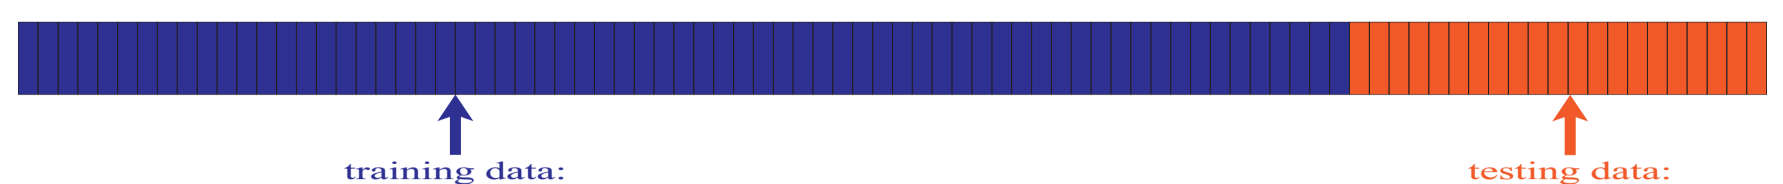

In [ ]:
df_train = data.head(1000)
df_label = df_train['quality']
df_train = df_train.drop('quality', axis = 1)

In [ ]:
df_train.head()

In [ ]:
df_test = data.tail(599)
test_label = df_test['quality']
df_test= df_test.drop('quality', axis = 1)

In this notebook only DecisionTreeClassifier is used to show how the model accuracy varies with respect to different model validation methods.

In [ ]:
train_acc = [0.5]
test_acc = [0.5]
for depth in range(1, 20):
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    
    clf.fit(df_train, df_label)
    
    train_pred = clf.predict(df_train)
    acc_train = metrics.accuracy_score(df_label, train_pred)
    
    test_pred = clf.predict(df_test)
    acc_test = metrics.accuracy_score(test_label, test_pred)
    
    train_acc.append(acc_train)
    test_acc.append(acc_test)

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(train_acc, label = 'train accuracy')
plt.plot(test_acc, label = 'test accuracy')
plt.legend(loc='upper left', prop = {'size': 15})
plt.xticks(range(0, 20, 5))
plt.xlabel('max_depth', size = 20)
plt.ylabel('accuracy', size = 20)
plt.show()

From the graph plotted above it is quite clear that the model fails in predicting most real world data accurately, with the highest accuracy of approx 0.57 at the max depth of 5. The model overfits as the train accuracy is much higher than the test accuracy.

# Cross Validation:

Cross validation is a technique in the process of building any machine learning model which ensures that the modle fit the data accurately and doesn't overfit the data. 


In this notebook we will only look at K-Fold cross validation and startified K-Fold cross validation.

# K-Fold Cross Validation:
It involves randomly k-fold CV dividing the set of observations into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the machine learing model is fit on the remaining k - 1 folds.

This procedure is repeated k times; each time, a different group of observations is treated as a validation set.
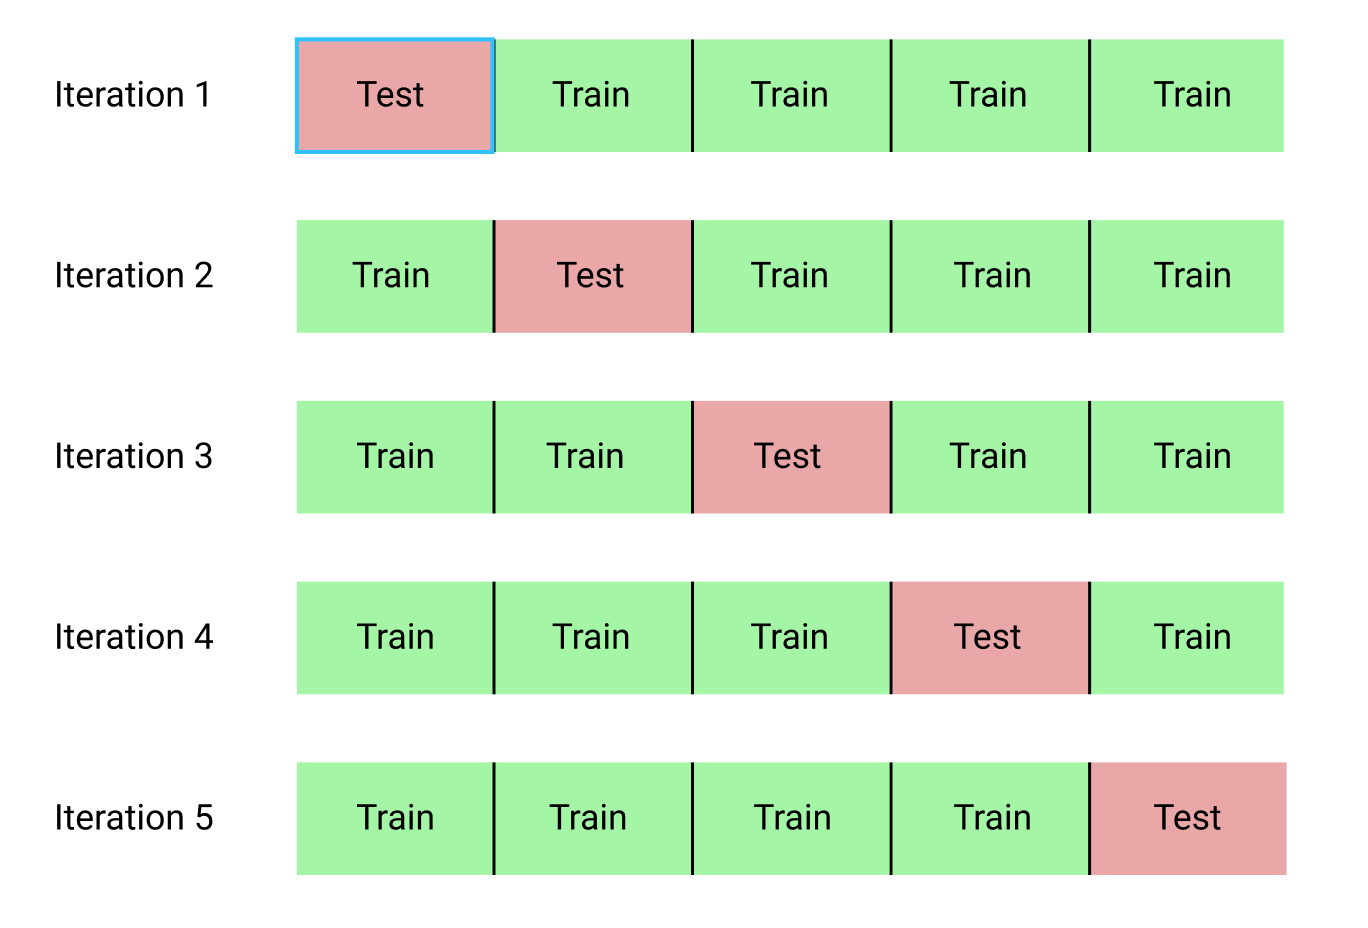

Image Source: [https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85](http://)

In [ ]:
#Applying KFold Cross validation
#create a new column kfold with entries -1
data['kfold'] = -1
#Shuffle data
data = data.sample(frac = 1).reset_index(drop = True)
#Split data into 5 folds
kf = model_selection.KFold(n_splits = 5)
for fold, (t, v) in enumerate(kf.split(X=data)):
    data.loc[v, 'kfold'] = fold
#Saving data for further use
data.to_csv('t_fold.csv', index = False)

First we will see the accuracy by taking different training and validation sets and its accuracy with the increasing depth of decision tree.

In [ ]:
def check(fold):
    df = pd.read_csv('./t_fold.csv')
    df_train = df[df.kfold != fold].reset_index(drop = True)
    df_test = df[df.kfold == fold].reset_index(drop = True)  
    
    y_train = df_train.quality.values
    x_train = df_train.drop('quality', axis = 1).values
    
    y_valid = df_test.quality.values
    x_valid = df_test.drop('quality', axis = 1).values
    
    ktrain_acc = [0.5]
    ktest_acc = [0.5]
    for depth in range(1, 20):
        clf = tree.DecisionTreeClassifier(max_depth = depth)

        clf.fit(x_train, y_train)

        train_pred = clf.predict(x_train)
        acc_train = metrics.accuracy_score(y_train, train_pred)

        test_pred = clf.predict(x_valid)
        acc_test = metrics.accuracy_score(y_valid, test_pred)

        ktrain_acc.append(acc_train)
        ktest_acc.append(acc_test)
    plt.figure(figsize=(10,5))
    sns.set_style('whitegrid')
    plt.plot(ktrain_acc, label = 'train accuracy')
    plt.plot(ktest_acc, label = 'test accuracy')
    plt.legend(loc='upper left', prop = {'size': 15})
    plt.xticks(range(0, 20, 5))
    plt.xlabel('max_depth', size = 20)
    plt.ylabel('accuracy', size = 20)
    plt.show()

In [ ]:
#Taking fold 0 as test set and rest as training set
check(fold = 0)

In [ ]:
#Taking fold 1 as test set and rest as training set
check(fold = 1)

In [ ]:
#Taking fold 2 as test set and rest as training set
check(fold = 2)

In [ ]:
#Taking fold 3 as test set and rest as training set
check(fold = 3)

In [ ]:
#Taking fold 4 as test set and rest as training set
check(fold = 4)

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. The code below shows the result at the max depth of 12 and the accuracy is at differnt folds taken one at a time and the the average is calculated.

In [ ]:
X = pd.read_csv('./t_fold.csv')
y = X.quality.values
X = X.drop('quality', axis = 1).values
clf = tree.DecisionTreeClassifier(max_depth = 20)
scores = model_selection.cross_val_score(clf, X, y, cv=5)
print(scores)

In [ ]:
#Calculating the average
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

But still we can see the problem of overfitting, let's try to improve the model further by trying another validation technique

In [ ]:
sns.countplot(data['quality'])

# Stratified K Fold 

From the Graph above it is quite clear that the data is skewed for a classification problem as there is very less data availble for the wine with quality index 0. Wine with quality index 1 and 5 also have a little sample, while the wine with quality index 2 and 3 have a huge amount of samples availble. For this classification purpose, simple kfold validation doesn't produced good results. So we move to another cross validation technique called stratified k fold.

This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.
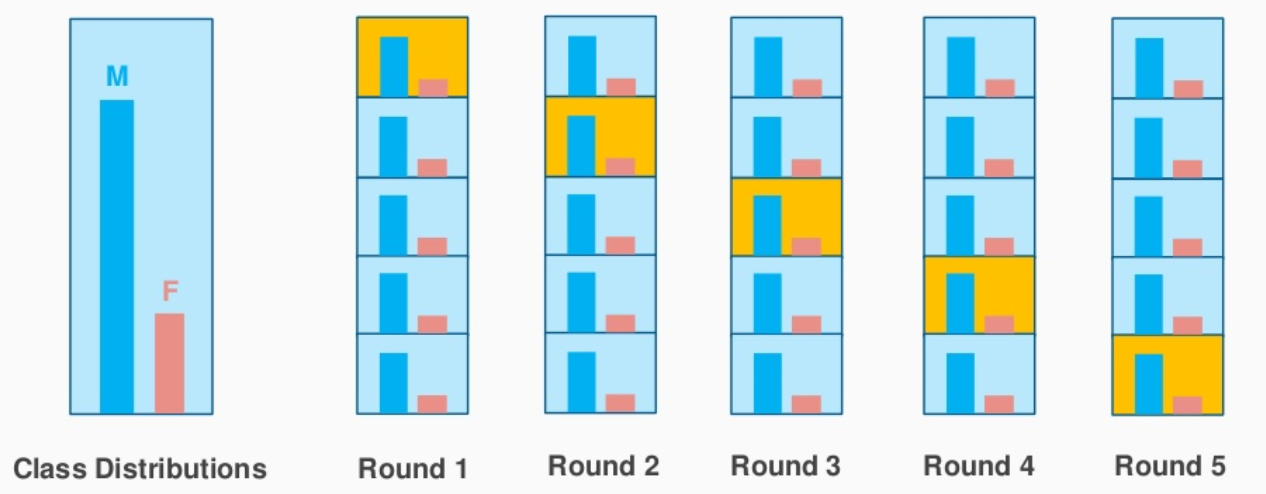


The implementation is designed to:

* Generate test sets such that all contain the same distribution of classes, or as close as possible.
* Be invariant to class label: relabelling y = ["Happy", "Sad"] to y = [1, 0] should not change the indices generated.
* Preserve order dependencies in the dataset ordering, when shuffle=False: all samples from class k in some test set were contiguous in y, or separated in y by samples from classes other than k.
* Generate test sets where the smallest and largest differ by at most one sample.

Source: [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html](http://)


In [ ]:
#Applying stratied k-fold
y_data = data.quality.values
kf = model_selection.StratifiedKFold(n_splits = 5)
for fold, (t, v) in enumerate(kf.split(X=data, y = y_data)):
    data.loc[v, 'kfold'] = fold
data.to_csv('st_fold.csv', index = False)

In [ ]:
def check_stratified(fold):
    df = pd.read_csv('./st_fold.csv')
    df_train = df[df.kfold != fold].reset_index(drop = True)
    df_test = df[df.kfold == fold].reset_index(drop = True)  
    
    y_train = df_train.quality.values
    x_train = df_train.drop('quality', axis = 1).values
    
    y_valid = df_test.quality.values
    x_valid = df_test.drop('quality', axis = 1).values
    
    sktrain_acc = [0.5]
    sktest_acc = [0.5]
    for depth in range(1, 20):
        clf = tree.DecisionTreeClassifier(max_depth = depth)

        clf.fit(x_train, y_train)

        train_pred = clf.predict(x_train)
        acc_train = metrics.accuracy_score(y_train, train_pred)

        test_pred = clf.predict(x_valid)
        acc_test = metrics.accuracy_score(y_valid, test_pred)

        sktrain_acc.append(acc_train)
        sktest_acc.append(acc_test)
    plt.figure(figsize=(10,5))
    sns.set_style('whitegrid')
    plt.plot(sktrain_acc, label = 'train accuracy')
    plt.plot(sktest_acc, label = 'test accuracy')
    plt.legend(loc='upper left', prop = {'size': 15})
    plt.xticks(range(0, 20, 5))
    plt.xlabel('max_depth', size = 20)
    plt.ylabel('accuracy', size = 20)
    plt.show()

In [ ]:
#Taking fold 0 as test set and rest as training set
check_stratified(fold = 0)

In [ ]:
#Taking fold 1 as test set and rest as training set
check_stratified(fold = 1)

In [ ]:
#Taking fold 2 as test set and rest as training set
check_stratified(fold = 2)

In [ ]:
#Taking fold 3 as test set and rest as training set
check_stratified(fold = 3)

In [ ]:
#Taking fold 4 as test set and rest as training set
check_stratified(fold = 4)

In [ ]:
X = pd.read_csv('./st_fold.csv')
y = X.quality.values
X = X.drop('quality', axis = 1).values
clf = tree.DecisionTreeClassifier(max_depth = 20)
scores = model_selection.cross_val_score(clf, X, y, cv=5)
print(scores)
#Calculating the average
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

You can see from above graph visualisation and the accuracy score that stratified k fold produced much better result than the k fold technique of model validation. Thus whenever there is an uneven distribution of targets choose stratified k-fold instead of simple k-fold validation.